# Previously, 

we did a binary classification using weight matrices and matrix muliplications.  

# In this notebook, we will:
- learn the preliminaries such as downloading existing datasets, loading data and creating training and test datasets
- learn how to work on a multi-class classification problem using MNIST images as our dataset
- learn how to solve it using two ways: weight matrices and matrix multiplications, and Pytorch's `nn` module
- learn how to build a simple network for solving that problem 'til forward pass 

# Preliminaries

Here we discuss:
- MNIST dataset
- how to:
  - download existing datasets
  - load data
  - create training and test datasets

## MNIST Dataset

![mnist img](https://github.com/lbleal1/Udacity-AI/blob/master/assets/mnist.png?raw=true)

- consist of greyscale handwritten digits 
- each image is 28x28 pixels


## Downloading and Loading Data

In [1]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

!wget https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py
import helper 

import matplotlib.pyplot as plt

--2020-01-07 15:20:29--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2813 (2.7K) [text/plain]
Saving to: ‘helper.py.2’

helper.py.2         100%[===================>]   2.75K  --.-KB/s    in 0s      

2020-01-07 15:20:29 (42.6 MB/s) - ‘helper.py.2’ saved [2813/2813]



In [0]:
### Run this cell

# package for downloading and loading datasets
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)

# Load training data
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
# batch_size = 64 
# -the number of images we get in one iteration 
#  from the data loader and pass through our network, 
#  often called a batch
# shuffle = True
# - tells it to shuffle the dataset every time we start
#   going through the data loader again

Now that's set, let's get those images and labels. There are 

(2) Two Ways to go through the batches
1. for loop                       
we usually use this one as we want it to go over all batches in our dataset.
```python
for image, label in trainloader:
    ## do things with images and labels
```

2. iter()                                                      
this one is much convenient when you want to somewhat manually load the batches. The snippet below loads only the first batch. 

```python
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)
```



In [3]:
# we will use the iter() for now

dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


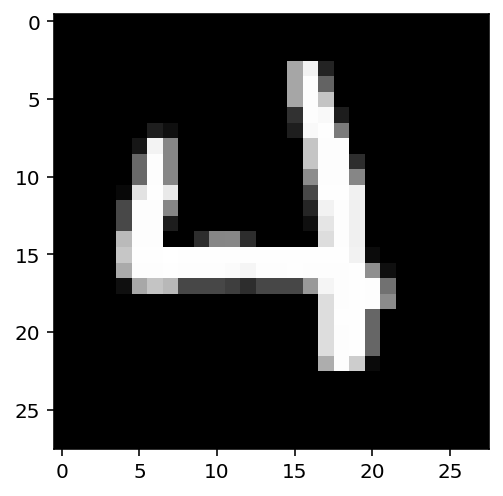

In [4]:
# looking to one of the images
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

# Building a Simple Network (plus Forward Pass) for Multi-class Classification



Before anything else, what we're seeing so far are **fully-connected networks**.

**Fully-connected networks (a.k.a dense networks**
- Each unit in one layer is connected to each unit in the next layer. 
- *requirement:* the input to each layer must be a one-dimensional vector (which can be stacked into a 2D tensor as a batch of multiple examples)


## 1. Using Weight Matrices and Matrix Multiplication

This is the same as the previous notebook, the differences here are:
- we have a different dataset
- different activation functions 
  - sigmoid function for the hidden layer
  - softmax function for the output layer
    
    recalling the formula:

  $$\Large \sigma(x_i) = \cfrac{e^{x_i}}{\sum_k^K{e^{x_k}}}$$

    
   
Also, given the requirement above, we have to do *flattening*.

**Flattening**
- conversion of two or many dimensional tensors to 1D vectors

In our case, since our dataset have a shape of 28x28 that is `(64, 1, 28, 28)` where 
- 64 is the batch size
- 1 is the channel (here only greyscale)
- 28,28 is the 28x28

we want to turn that 28x28 to a 1D vector which means it will only be 784 that is `(64, 1, 784)`

In [5]:
def activation(x):
    return 1/(1+torch.exp(-x))

# Flatten the input images
# .view is for reshaping
# images.shape[0] is the batch size
# -1 is for flattening (can be 784; -1 is a shortway of doing it)
inputs = images.view(images.shape[0], -1)

# Create parameters
w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs, w1) + b1)

out = torch.mm(h, w2) + b2
# we now have 10 outputs for our network

#We want to pass in an image to our network and get out a probability distribution over the classes that tells us the likely class(es) the image belongs to.
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)
# we used dim = 1 takes the sum across the rows 
# (while dim==0 takes the sum of the columns) 

probabilities = softmax(out)

# Shape should be (64, 10)
# 64 images
# 10 classes
print(probabilities.shape)  

# Summation of the probabilities should be 1
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


The `out` shall look like ![Softmax Function](https://github.com/lbleal1/deep-learning-v2-pytorch/blob/master/intro-to-pytorch/assets/image_distribution.png?raw=1')

since we have an untrained network which means it hasn't seen any data yet so it just returns a uniform distribution with equal probabilities for each class.


## 2. Using the `nn` PyTorch module

### Python `nn` module 

- makes building networks much simpler
- we can do what we did in #1 using this one

In [0]:
from torch import nn

### (2) Two Ways to Use Build Neural Nets using the `nn` module



#### 1. Without using `nn.Sequential`

##### Defining Neural Nets

In [0]:
#inheriting from nn.Module
# * The name of the class itself can be anything.
class Network(nn.Module):
  #together with the nn.Module
  # creates a class that tracks the architecture and 
  # provides a lot of useful methods and attributes. 
  # * It is mandatory to inherit from nn.Module when 
  #   you're creating a class for your network.
    def __init__(self):
        super().__init__()

        
        # Inputs to hidden layer linear transformation
        
        # - creates a module for a linear transformation,  
        #   xW+b , with 784 inputs and 256 outputs and 
        #   assigns it to self.hidden.
        # - module automatically creates the weight 
        #   and bias tensors which we'll use in the forward method.
        # * access the weight and bias tensors once the network (net) 
        #   is created with net.hidden.weight and net.hidden.bias.
        self.hidden = nn.Linear(784, 256)
        
        # Output layer, 10 units - one for each digit
        # this creates another linear transformation with 256 inputs and 10 outputs.
        self.output = nn.Linear(256, 10)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        # nn.Softmax(dim=1) calculates softmax across the columns


    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [8]:
# Create the network and look at it's text representation
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

***A More Concise Way of Defining Networks***

- here we use the using the `torch.nn.functional` module
- this is the most common way you'll see networks defined as many operations are simple element-wise functions.
- convention: we normally import this module as `F`, `import torch.nn.functional as F`.

In [0]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = F.sigmoid(self.hidden(x))
        # Output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)
        
        return x

**ASIDE: Activation Functions**

So far we've only been looking at the sigmoid activation function, but in general any function can be used as an activation function. The only requirement is that for a network to approximate a non-linear function, the activation functions must be non-linear. Here are a few more examples of common activation functions: Tanh (hyperbolic tangent), and ReLU (rectified linear unit).

In practice, the ReLU function is used almost exclusively as the activation function for hidden layers.

The example is as below:

In [10]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Defining the layers, 128, 64, 10 units each
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        # Output layer, 10 units - one for each digit
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        ''' Forward pass through the network, returns the output logits '''
        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        
        return x

model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

***Remark:***
It's good practice to name your layers by their type of network, for instance 'fc' to represent a fully-connected layer as we did above.

**ASIDE: Initializing weights and biases**

***Remark:***                                                                  

- Weights and such are automatically initialized for you, but it's possible to customize how they are initialized.
- The weights and biases are tensors attached to the layer you defined, you can get them with model.fc1.weight for instance.

For custom initialization, we want to modify these tensors in place. These are actually autograd *Variables*, so we need to get back the actual tensors with *model.fc1.weight.data*. Once we have the tensors, we can fill them with zeros (for biases) or random normal values.




In [11]:
# Set biases to all zeros
model.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
# sample from random normal with standard dev = 0.01
model.fc1.weight.data.normal_(std=0.01)

tensor([[ 0.0166,  0.0172,  0.0186,  ..., -0.0085,  0.0010, -0.0149],
        [ 0.0077,  0.0087, -0.0057,  ..., -0.0010,  0.0037,  0.0038],
        [ 0.0026, -0.0068,  0.0055,  ...,  0.0122,  0.0153, -0.0086],
        ...,
        [-0.0102, -0.0090, -0.0179,  ...,  0.0116,  0.0044, -0.0025],
        [ 0.0114,  0.0020, -0.0030,  ...,  0.0048, -0.0021,  0.0167],
        [-0.0147,  0.0186, -0.0013,  ..., -0.0095, -0.0028, -0.0122]])

##### Forward Pass
We try passing an image to our defined neural network.

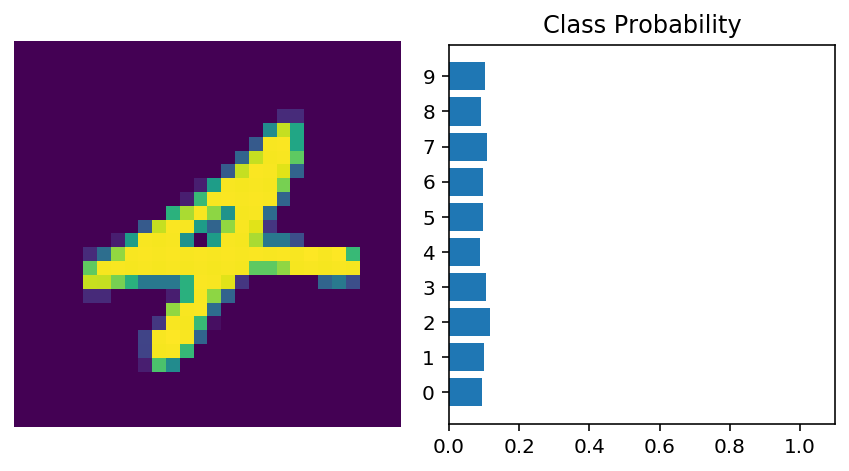

In [13]:
# Grab some data 
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

# Forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx,:])

img = images[img_idx]
helper.view_classify(img.view(1, 28, 28), ps)

***Remark:***

As you can see above, our network has basically no idea what this digit is. It's because we haven't trained it yet, all the weights are random!

#### 2. Using `nn.Sequential`

**`nn.Sequential`**
- a convenient way to build networks like this where a tensor is passed sequentially through operations


##### (2) Two Ways to use `nn.Sequential`

###### 1. Without Dictionary





Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


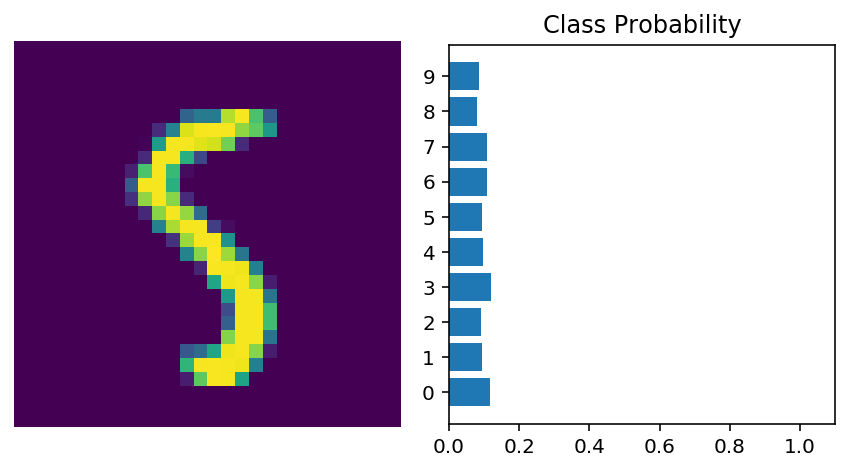

In [14]:
# the equivalent network is

# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
helper.view_classify(images[0].view(1, 28, 28), ps)

***Remark: On Accessing the Model Operations***
- The operations are available by passing in the appropriate index. 

  For example, if you want to get first Linear operation and look at the weights, you'd use model[0].

###### 2. With Dictionary

In [15]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

***Remark: On Accessing the Model Operations***
- instead of using indices **only**, we **can also** use a dictionary to name the individual layers ad operations

  *Note:  dictionary keys must be unique, so *each operation must have a different name.*

In [16]:
print(model[0])
print(model.fc1)

Linear(in_features=784, out_features=128, bias=True)
Linear(in_features=784, out_features=128, bias=True)


# Next

Now that we've learned how to define neural networks, we next learn how to train them in our next notebook!